In [1]:
# suppress tensorflow logging, usually not useful unless you are having problems with tensorflow or accessing gpu
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# globally useful libraries / namespaces for this notebook
import numpy as np
import matplotlib.pyplot as plt

# notebook wide settings for plotting visualizations
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 2: The Mathematical Building Blocks of Neural Networks

Supporting materials for:

Chollet (2021). *Deep Learning with Python*. 2nd ed. Manning Publications Co.
[Amazon](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1?crid=32NFM2SBCJVQQ)

Understanding deep learning requires familiarity with many simple mathematical
concepts: tensors, tensor operations, differentiation, gradient descent, and so on.
Out goal in this notebook/chapter is to build up your intiution about these mathematical
concepts without getting over technical.

One note about the term tensors.  **Tensor** is a mathematical term that simply can be used to refer
to a matrix of values, no matter how many dimensions.  Thus a 1-dimensional vector or a 2-dimensional
matrix are both *Tensors*, as well as 3-dimensional or higher matrices.  Vectorized programming
could also be referred to as tensor programming, but the term vectorized programming was coined
before the term tensor was in common use.  Another difference is that the term Tensor programming
and Tensor libraries have come to mean the types of vectorized or tensor operations we usually think of, but
it also includes libraries that can automatically differentiate such tensors with respect to
a loss function.  We will get to these concepts in a bit more detail below.



## Note: Installing Keras/TensorFlow

For this textbook we are using the `TensorFlow` library and mostly accessing the `Keras`
neural network and deep learning API through the `TensorFlow`.  You will need to have
a recent version of `Tensorflow/Keras` installed on your machine and available to your
iPython kernel to run this notebook.  At the time of creation of this notebook, 
`TensorFlow/Keras` is no longer supported directly by the `Conda` package manager.  You
should be doing a `pip install` command of `TensorFlow` to correctly get the 
most recent `TensorFlow` libraries with the `Keras` API available:

```
$ python3 -m pip install 'tensorflow'
```

If you have a suitable Nvidia GPU processor available on your your machine, you can get the `cuda` libraries
setup and installed for `TensorFlow` by doing:

```
python3 -m pip install 'tensorflow[and-cuda]'
```

See the official [Install TensorFlow 2](https://www.tensorflow.org/install) for more detailed information about correctly
getting `TensorFlow/Keras` installed on your system. [Install TensorFlow with pip](https://www.tensorflow.org/install/pip) 
has information on installing cuda/Nvidia.


# 2.1 A first look at a neural network

The problem we will look at initially is building a neural network to classify handwritten digits.  
The MNIST dataset (a classic in ML) contains grayscale images of handwritten digits
that are 28 x 28 pixels in size, and each image is labeled with their correct category 0-9.

The MNIST dataset contains 60,000 images meant to be used for training, and another 10,000
images we can use for testing.  The following command loads the MNIST dataset.  This dataset has
been referred to as the *fruit fly* model of vision machine learning, and is often used as a
benchmark for doing neural network and deep learning examples.

The dataset is still relatively big, despite being used for learning, so it actually downloads the
data for you.  The result of loading the data is a set of `NumPy` n-dimensional arrays (Tensors)
holding the images and the labeles of the data.

In [2]:
# note: we will usually put all imports at top of notebook, unless
# we are specifically learning about how to use a library
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2025-05-22 18:51:08.808861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747939868.828341   20310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747939868.833946   20310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747939868.847875   20310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747939868.847900   20310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747939868.847903   20310 computation_placer.cc:177] computation placer alr

The images are encoded as `NumPy` arrays, and the labels are an array of digits, ranging
from 0 to 9.  Here is the training data:

In [3]:
type(train_images)

numpy.ndarray

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels.dtype

dtype('uint8')

In [9]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The test data is similar but there are only 10,000 different images in the testing dataset.

The images are 28x28 shapes arrays of `uint8` greyscale pixels.  For example, the data for 
the first training image looks like:

In [10]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

But this is hard to visualize.  When can actually render the hand drawn digits to see what
they look like as follows (You should try looking at some other images than image 0 we show here):

Label for image:  3


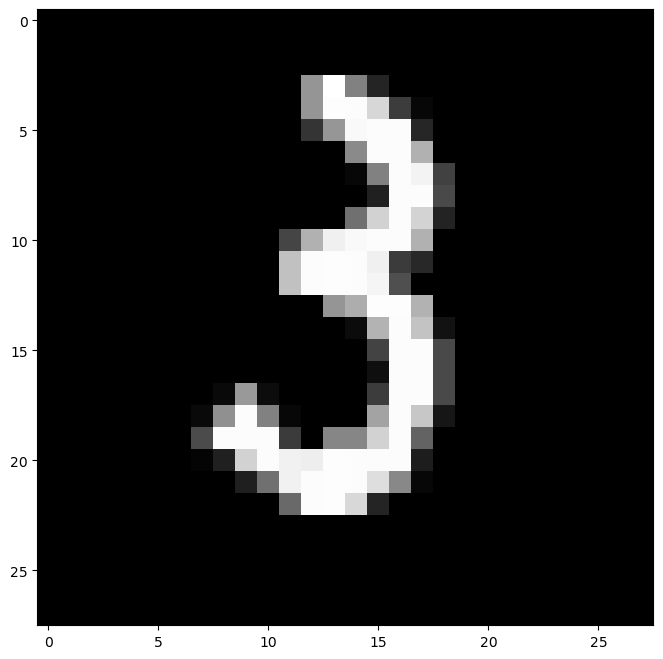

In [11]:
# make a slice of the 28x28 pixel values of training image 0
img_no = 1234
img = train_images[img_no,:,:]

# display the imge using matplotlib
plt.imshow(img, cmap='gray');

# confirm that the label for this image matches
print('Label for image: ', train_labels[img_no])

The workflow to create an image classifier using `TensorFlow/Keras` neural networks is

1. First we'll create and compile a neural network architecture using the `Keras` library.
2. We will need to do a little bit of data cleaning of the images to make them suitable for training with.
3. Then we will feed the neural network the training data, `train_images` and
   `train_labels`.  The network will learn to associate image inputs with the label as its output.
4. Finally once the network is trained, we can ask the network to produce predictions for
   the `test_images`, and we can evaluate its performance.

## The network architecture

The core building block of a neural network is the *layer*.  The following network architecutre is very simple.
Don't worry about the details yet, we will learn about what all of this means as we go along in the course.

A networks consists of a sequence of layers.  We will add 2 `Dense` layers to the network we are going to train.  A `Dense` layer
is a fully connected layer, all inputs to the layer are fully connected to each output of the layer.

We will talk about the activation functions in more detail later.
Notice that the first layer uses an 'relu' activation
function, while the second layer uses a 'softmax' activation function.
A 10-way *softmax* layer means that this layer will return an array of 10 probability
scores (summing to 1).  Each score will represent the probability that the current
image belongs to one of the 10 output labels.


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

# create a full model with a dense layer and activation layer
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

To make the model ready for training, we need to specify three more things as part of the
*compilation* step to finalize the network architecture:

1. A *loss function* - How the network will measure its performance
2. An *optimizer* - The mechanism through wich the network updates itself
3. *Metrics to monitor* during training and testing.

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2025-05-22 18:51:14.261206: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Again don't be too worried yet about the details here, we will discuss all of these concepts in our
class.  In this first example, our model will use `categorical_crossentropy` as the loss function,
and the simple `rmsprop` optimizer to perform gradient descent on the network weights.  The library will
track and report on the accuracy of the model as it trains.

## Preparing the image data

Before training, we need to do a little bit of preprocessing and data cleaning.  This is not unusual, you will
often need to perform some data preparation on your data before it can be used successfully by a machine
learning algorithm.

We will reshape all of the image data, into a flat set of 28x28 = 784 inputs, which is what the input layer to
this network expects.  

Also before training we will scale all of the input to values in the `[0, 1]`.  If you noticed above, all
of the image pixel values are currently in the range `[0, 255]`.  Previously our training images
were stored in an array of shape `(60000, 28, 28)` of type `uint8`.  We will transform it into
a `float32` array of shape `(60000, 28 * 28)` with all pixel values between 0 and 1.

In [14]:
# flatten the 2-d images to 1-d of 784 inputs
train_images = train_images.reshape((60000, 28 * 28))

# transform the greyscale integer values to floats for input
train_images = train_images.astype('float32') / 255.0

# show results
print( train_images.shape )
print( train_images.dtype )

# transform the test images as well in the same way while we are at it
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.0

(60000, 784)
float32


**NOTE**: The following is not shown in my 2nd edition of the textbook.  However, the
training labels must have the same shape as the output layer for a `Keras` network.  Currently
the labels are simply values from `[0 - 9]` but instead we need an array of 10
columns with a `1` for the image category, and `0` for all others.  We can use the 
`to_categorical()` method to perform this transformation.

In [15]:
# notice before the shape of the labels and their values
print(train_labels.shape)
print(train_labels[0])

(60000,)
5


In [16]:
from tensorflow.keras.utils import to_categorical

# use 1-hot encoding to make into categorical labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# now the labels have 10 columns, with a 1 set for the image category
print(train_labels.shape)
print(train_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Training the model

We're now ready to train the model, which in the `Keras` API is done by calling the model's `fit()`
method.  We *fit* the model to its training data.  

In [18]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8747 - loss: 0.4322
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9659 - loss: 0.1168
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9780 - loss: 0.0724
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9854 - loss: 0.0503
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9897 - loss: 0.0366


Notice that the measure of the loss and the accuracy are reported by the training here.
We will discuss how a loss (or fitness) function works in more detail, it is being
used to actually change the weights to improve the performance of the model.  So you should
see the loss decrease over the 5 epochs of training since we are minimizing the loss
here.

Likewise notice that the acuracy is reported since we asked that metric to be monitored
when we compiled the network architecture.  You should typically see that we get
over 98% accuracy on the training data after 5 epochs of training.
over 98% accuracy on the training data after only 5 epochs of training.

But the true test is how well the trained network does on data it has not seen before.  We
can evaluate the performance on the test data like this:

## Using the model to make predictions

Now that we have trained a model, we can use it to make predictions on images that it has never seen before. 
For example, lets take the first test images and ask the model to make predictions of what
digit category is in those images.

In [19]:
# the astute student might notice we pull out two digits here, but we are only going to look at the index 0 image prediction
test_digit = test_images[0:1]
predictions = model.predict(test_digit)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([1.0132537e-08, 1.6266772e-09, 4.1710368e-06, 5.6054610e-05,
       4.5472580e-12, 4.6540372e-08, 3.5877470e-13, 9.9993932e-01,
       2.1280117e-08, 4.3399370e-07], dtype=float32)

Don't let the scientific notation of the output confuse you.  If it is easier, we can ask `NumPy`
to display the values using fixed notation.

In [20]:
# suppress scientific notation and show 8 digits of precision
np.set_printoptions(suppress=True, precision=8)
predictions[0]

array([0.00000001, 0.        , 0.00000417, 0.00005605, 0.        ,
       0.00000005, 0.        , 0.9999393 , 0.00000002, 0.00000043],
      dtype=float32)

Most of the values were close to 0, except the value at position 7 of the array.  This means the
fitted model is giving a 99% probability that the input image category is 7.  We can confirm this.

Label for image:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Use argmax to determine maximum index, which is the category: 7


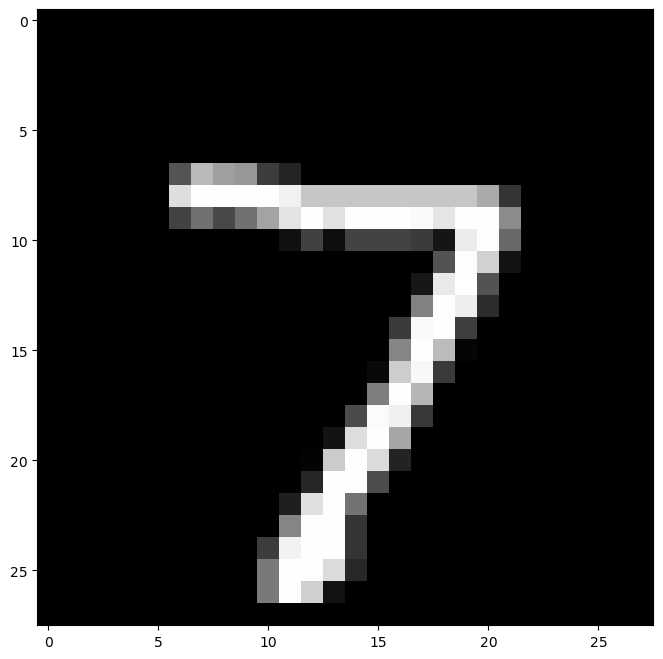

In [21]:
img_no = 0
img = test_digit[img_no,:].reshape(28,28)

# display the imge using matplotlib
plt.imshow(img, cmap='gray');

# confirm that the label for this image matches
print('Label for image: ', test_labels[img_no])
print('Use argmax to determine maximum index, which is the category:', predictions[0].argmax())

We saw that the accuracy when training the model was over 99% accurate.  But how well a model
does on the data it is trained with is not always a good indication of how the model will do
wit data it has never seen before.  Let's check the accuracy of the fitted model on the 
entire test set.

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc:  ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9777 - loss: 0.0738
test_loss:  0.06346900761127472
test_acc:   0.9800999760627747


You should usually see that the accuracy falls down to 97.8% here.  This may not seem to significant, but
it is quite a bit lower than the 98.9% accuracy that the model gets on the data while training.  

This gap between training and test accuracy is an example of *overfitting*.  Machine learning models tend to
perform worse on new data than on the data they are trained with because they overlean and model some of
the noise present in the data.